In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uditk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\uditk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
corpus = []
for i in range(len(dataset['Review'])):
    review = re.sub(r'[^a-zA-Z]',' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    stopwords_set = set(stopwords.words('english'))
    review = [ps.stem(word) for word in review if not word in stopwords_set]
    review = ' '.join(review)
    corpus.append(review)

In [4]:
# Creating the Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
Y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(Y_test, Y_pred))
cm = confusion_matrix(Y_test, Y_pred)
cm

0.735


array([[52, 45],
       [ 8, 95]], dtype=int64)

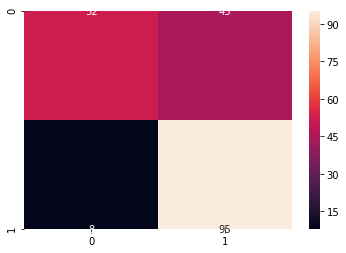

In [9]:
import seaborn as sns
sns.heatmap(cm, annot=True)